# Regularization - Ridge and Lasso Regression 

One of the major aspects of training your machine learning model is avoiding overfitting. The model will have a low accuracy if it is overfitting. This happens because your model is trying too hard to capture the noise in your training dataset. By noise we mean the data points that don’t really represent the true properties of your data, but random chance. Learning such data points, makes your model more flexible, at the risk of overfitting.

### Regularization definition:

The word regularize means to make things regular or acceptable. This is exactly why we use it for. Regularizations are techniques used to reduce the error by fitting a function appropriately on the given training set and avoid overfitting.

This is a form of regression, that constrains/ regularizes or shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.

It is a technique used for tuning the function by adding an additional penalty term (lambda) in the error function. The additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values. This technique of keeping a check or reducing the value of error coefficients are called shrinkage methods or weight decay in case of neural networks.

###### Overfitting can also be controlled by increasing the size of training dataset i.e adding more rows of data not columns(features).

To learn the math behind this concept refer: https://towardsdatascience.com/regularization-an-important-concept-in-machine-learning-5891628907ea

#### Used in Feature Selection :
Least squares fitting works most of the time, but there are situations where it will fail.    

For example, if your number of observations n is greater than the number of predictors p, then the least squares estimates will have a low variance and it performs well. On the other hand, with p is greater than n (more predictors than observations), then variance is infinite and the method cannot be used!    

Also, multiple linear regression tends to add variables that are not actually associated with the response. This adds unnecessary complexity to the model. It would be good if there was a way to automatically perform feature selection, such as to include only the most relevant variables.
To achieve that, we can use subset selection and shrinkage methods such as ridge regression and lasso.



##### Let's check out the types of regularization methods with a dataset 'load_boston' which is house price prediction

Ref:https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [1]:
import pyforest
from sklearn.datasets import load_boston

In [2]:
df=load_boston()
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
dataset=pd.DataFrame(df.data , columns=df.feature_names)
#dataset.columns= df.feature_names
dataset.head()

<IPython.core.display.Javascript object>

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
dataset.shape

(506, 13)

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [6]:
dataset['Price']=df.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# Checking for null values in the data
dataset.isnull().any

<bound method DataFrame.any of       CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  Price  
0      F

In [8]:
# Setting the dependent and independent features

X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

### TRAIN TEST SPLIT 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=3)


## LINEAR REGRESSION 

#### First let us do Linear Regression and check the mean squared error
The more it is closer to 0 , the more the accuracy of the model

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

train_score=lin_reg.score(X_train, y_train)
test_score=lin_reg.score(X_test, y_test)

In [27]:
from sklearn.model_selection import cross_val_score
#calculating the mse using cross validation where we will perform the experiment 5 times
mse=cross_val_score(lin_reg,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse= np.mean(mse)
print("The average of MSE for linear regression :", mean_mse)



<IPython.core.display.Javascript object>

The average of MSE for linear regression : -37.13180746769905


## L2 Regularization -  RIDGE REGRESSION

In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.So lower the constraint (low λ) on the features, the model will resemble linear regression model

##### Now let us implement Ridge Regression and check the mean squared error
Ridge regression uses lambda and we can find lambda using Grid Search cross - validation

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters= {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error',cv=5 )
ridge_train= ridge_reg.fit(X_train,y_train)
ridge_test=ridge_reg.fit(X_test,y_test)

Ridge_train_score = ridge_train.score(X_train,y_train)
Ridge_test_score = ridge_test.score(X_test, y_test)

print ("Best parameter:" ,ridge_reg.best_params_)
print (" Best score: ", ridge_reg.best_score_)
print ("Ridge regression train score alpha:", Ridge_train_score)
print ("Ridge regression test score alpha:", Ridge_test_score)
print ("linear regression train score:", train_score)
print ("linear regression test score:", test_score)

Best parameter: {'alpha': 0.001}
 Best score:  -26.69980518830465
Ridge regression train score alpha: -27.51863768431225
Ridge regression test score alpha: -17.083120584921307
linear regression train score: 0.7419034960343789
linear regression test score: 0.7147895265576831


Here mse=-26.69 is better than mse of Linear regression calculated above

#### Plotting the coefficient magnitude of linear and ridge

In [21]:
# As Alpha=0.001 is the best parameter

rr001 = Ridge(alpha=0.001) #  comparison with alpha value
rr001.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
# Lets do the same with alpha =100
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

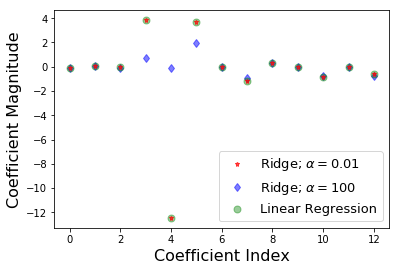

In [26]:
plt.plot(rr001.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
# z order for ordering the markers
# alpha here is for transparency
plt.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

Let’s understand the figure above. In X axis we plot the coefficient index and, for Boston data there are 13 features (for Python 0th index refers to 1st feature). For low value of α (0.01), when the coefficients are less restricted, the magnitudes of the coefficients are almost same as of linear regression. For higher value of α (100), we see that for coefficient indices 3,4,5 the magnitudes are considerably less compared to linear regression case. This is an example of shrinking coefficient magnitude using Ridge regression.

## L1 Regularization -  LASSO REGRESSION

Just like Ridge regression cost function, for lambda =0, the ridge equation becomes lasso. The only difference is instead of taking the square of the coefficients, magnitudes are taken into account. This type of regularization (L1) can lead to zero coefficients i.e. some of the features are completely neglected for the evaluation of output. So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection. 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_reg=GridSearchCV(lasso , parameters , scoring = 'neg_mean_squared_error', cv=5)
lasso_reg.fit(X,y)

print (lasso_reg.best_params_)
print (lasso_reg.best_score_)

Lasso regression ignores some of the features . It doesn't 'minimize the mse'. As ridge mse is better than lasso and linear , hence we will use ridge regression for boston housing dataset.

In [ ]:
prediction_lasso=lasso_reg.predict(X_test)
prediction_ridge=ridge_reg.predict(X_test)

#### PLOTTING RIDGE AND LASSO prediction

In [ ]:
# LASSO PREDICTION
sns.distplot(y_test-prediction_lasso)


In [ ]:
#RIDGE PREDICTION

sns.distplot(y_test-prediction_ridge)